# **Практика**. Формирование эмпирических распределений НСВ на основе полученных данных наблюдений. Оценка вероятностей попадания СВ в интервал
---


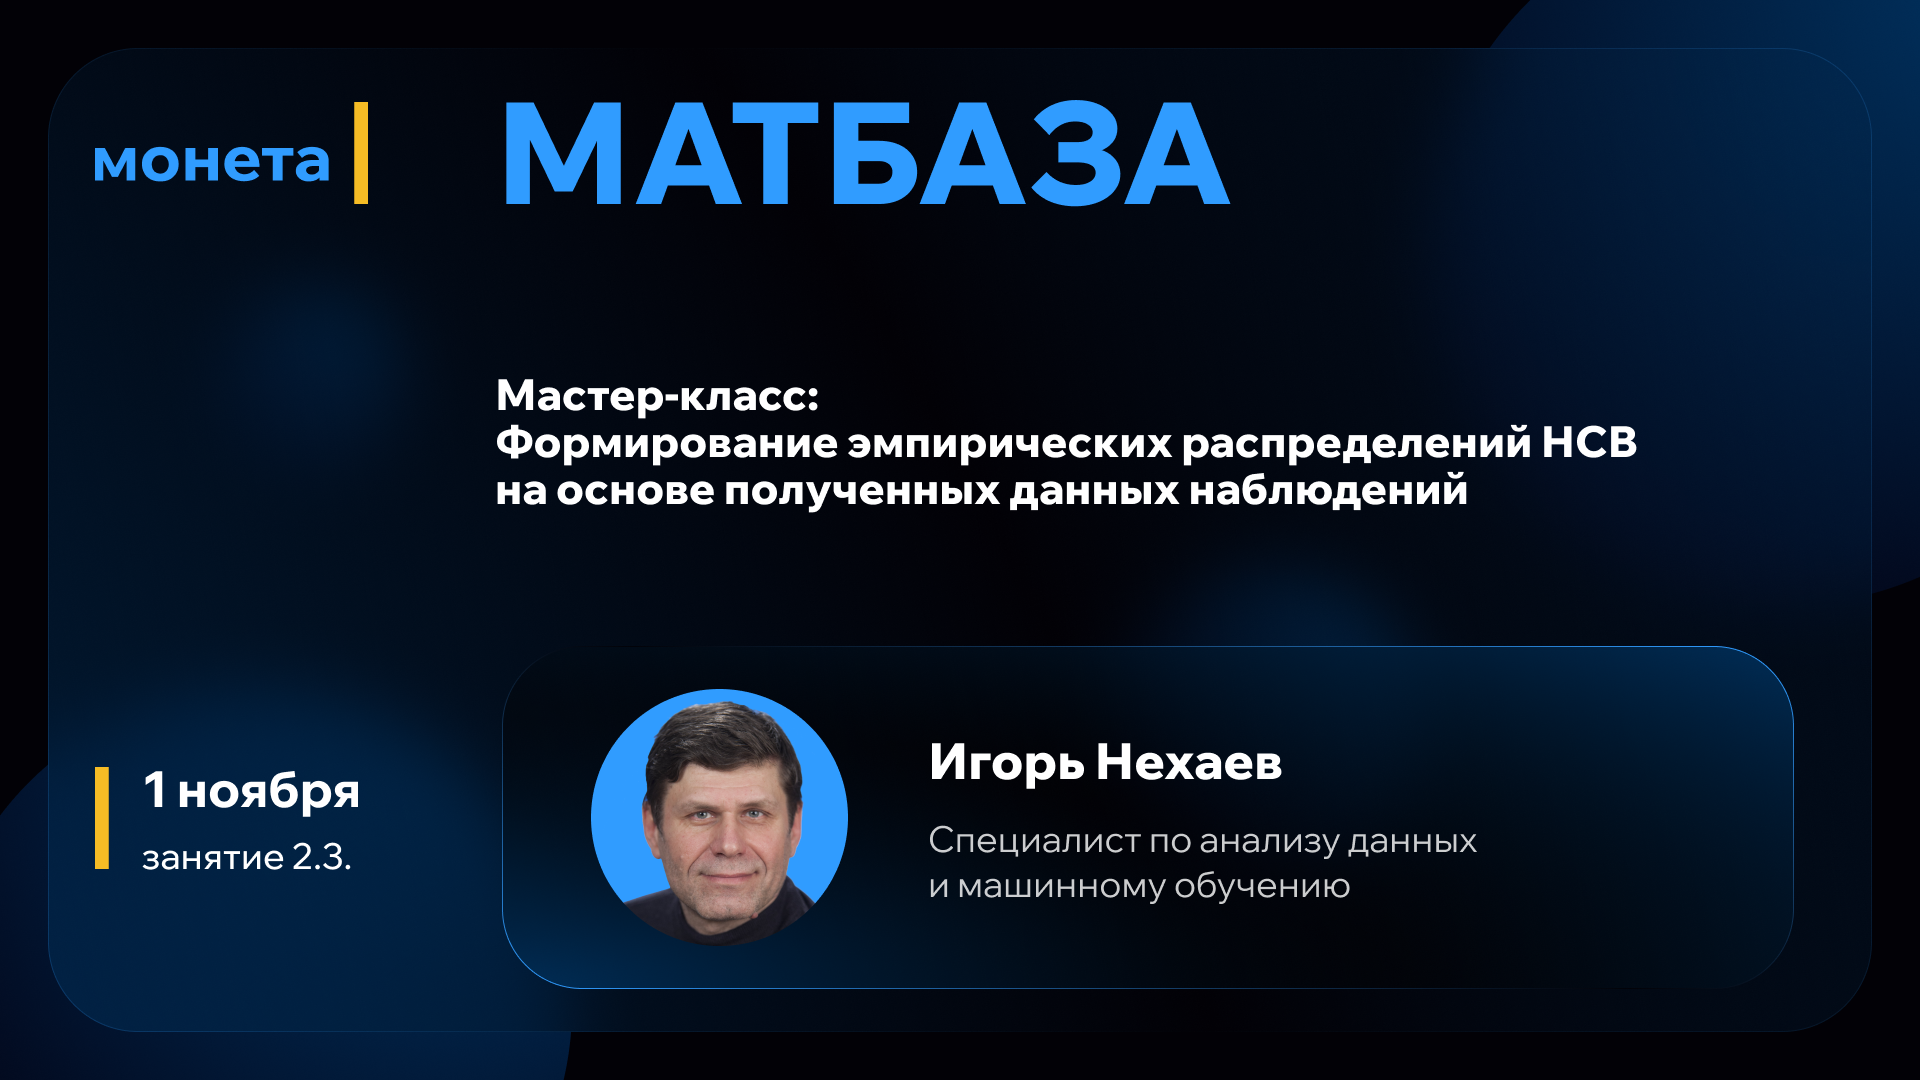

## Построение эмпирического распределения времени подключения заявок
---

Проанализируем поток заявок на подключение сайтов к системе интернет-платежей. Рассмотрим в качестве СВ "интервал времени между поступлением заявки клиента и его подключением к системе"

In [41]:
# импортируем нужные библиотеки
import pandas as pd
import os
import scipy.stats as stat
import numpy as np
np.set_printoptions(precision=3)
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# подключаем колаб к нашему гугл-диску
from google.colab import drive
drive.mount('/content/drive')

# устанавливаем рабочую директорию/каталог
path = "/content/drive/My Drive/Colab Notebooks/MS&InfTheory/TeorVer/data/"
os.chdir(path)
print(os.listdir("./"))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['Clients.xlsx', 'example_days_to_connect0.xlsx', 'Client_requests.xlsx', 'requests.xlsx', 'requests.csv']


In [42]:
# загружаем данные с временем подключения
data0 = pd.read_excel('example_days_to_connect0.xlsx', header=0)
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   days_to_connect   800 non-null    object
 1   days_to_transact  200 non-null    object
dtypes: object(2)
memory usage: 13.5+ KB


In [43]:
# пробуем извлечь время (дни) из строк в числа
def bad_value_transform(x):
    try:
        return int(x)
    except (TypeError, ValueError):
        return None

data0.days_to_connect = data0['days_to_connect'].apply(bad_value_transform)
data0.days_to_transact = data0['days_to_transact'].apply(bad_value_transform)
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   days_to_connect   199 non-null    float64
 1   days_to_transact  121 non-null    float64
dtypes: float64(2)
memory usage: 13.5 KB


In [44]:
# заменим все пропуски (незавершенные подключения) значением -1
data1 = data0.fillna(-1)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   days_to_connect   858 non-null    float64
 1   days_to_transact  858 non-null    float64
dtypes: float64(2)
memory usage: 13.5 KB


In [45]:
data1.head()

,days_to_connect,days_to_transact
0,27.0,28.0
1,-1.0,-1.0
2,-1.0,-1.0
3,-1.0,-1.0
4,-1.0,-1.0


In [46]:
# отфильтруем заявки, по которым подключение было завершено и запомним их время подключения
days_to_connect = data1.days_to_connect[data1.days_to_connect >= 0]
days_to_connect

0      27.0
20     37.0
23      6.0
24      6.0
25      6.0
       ... 
819     7.0
835     0.0
841     0.0
845     1.0
846     1.0
Name: days_to_connect, Length: 198, dtype: float64

### Построим эмприческую плотность распределения - гистограмму распределения
---
Для того, чтобы построить гистограмму распределения надо:
- определить интервал изменения значений СВ $(x_{min}, x_{max})$;
- разбить его на n подинтервалов $(x_i, x_{i+1}), i=0..n; \; x_0=x_{min}, \, x_n=x_{max}$;
- определить частоту $n_i$ попадания в каждый из интервалов - сколько заявок попало в i-й интервал  $(x_i, x_{i+1}), i=0..n$;
- определить относительную частоту $\nu_i = n_i / N, \; где N (=198) - мощность выборки (кол-во используемых в расчетах значений СВ)$;
- определить высоту столбика гистограммы на i-м интервале $h_i = \nu_i / (x_{i+1} - x_i)$.

Эмпирическая плотность распределения:

$$h(x) = h_i, x \in (x_i, x_{i+1})$$

In [77]:
Xvals = days_to_connect.values
N = len(Xvals)
min(Xvals), max(Xvals), N

(0.0, 91.0, 198)

In [78]:
# определить интервал изменения значений СВ
x_min, x_max = 0, 100

# разбить его на n подинтервалов
n = 20
x_i = np.linspace(x_min, x_max, n+1)
x_i

array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
        55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.])

In [79]:
# определить частоту  ni  попадания в каждый из интервалов
n_i = np.zeros(n, dtype=int)
for i in range(n):
    n_i[i] = len([Xvals[j] for j in range(N) if (x_i[i] <= Xvals[j] < x_i[i+1])])

n_i

array([124,  37,  11,   8,   4,   3,   2,   5,   2,   0,   0,   0,   0,
         1,   0,   0,   0,   0,   1,   0])

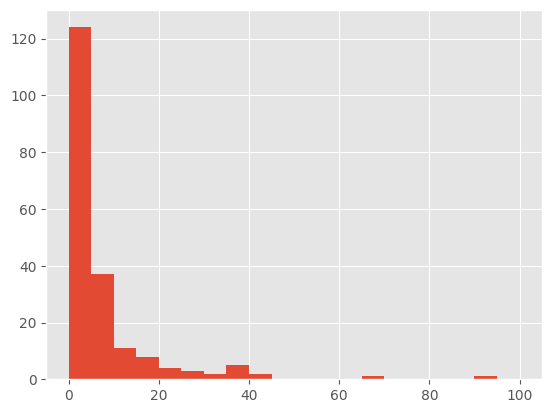

In [50]:
plt.hist(Xvals, bins=x_i);

In [80]:
# подсчитаем высоты гистограммы на интервалах
h_i = n_i / N / (x_i[1] - x_i[0])
h_i

array([0.125, 0.037, 0.011, 0.008, 0.004, 0.003, 0.002, 0.005, 0.002,
       0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.   ,
       0.001, 0.   ])

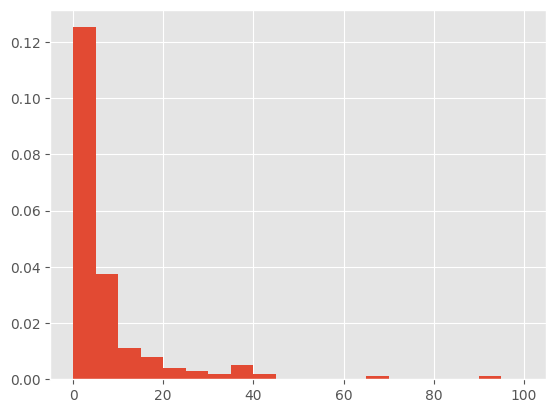

In [51]:
plt.hist(days_to_connect, bins=x_i, density=True);

### Построим эмпирическую функцию распределения СВ X = "Время подключения заявки"

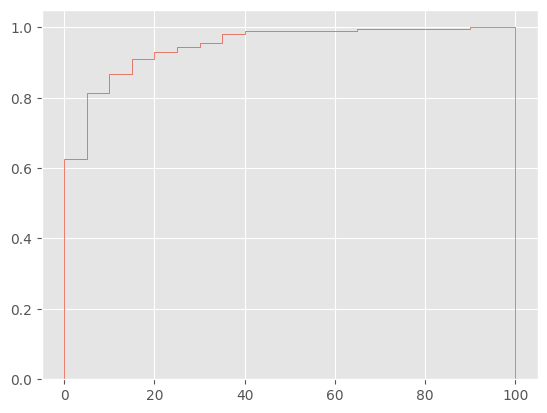

In [52]:
plt.hist(days_to_connect, bins=x_i, cumulative=True, histtype='step', density=True);

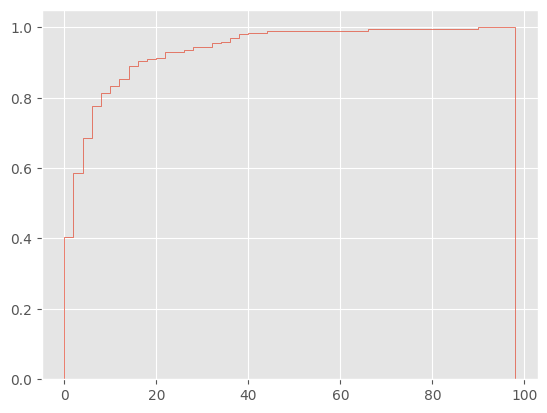

In [53]:
xbins = np.arange(0, 100, 2)
plt.hist(days_to_connect, bins=xbins, cumulative=True, histtype='step', density=True);

## Идентификация закона распределения времени подключения
---
Данная гистограмма распределения напоминает нам плотность экспоненциального распределения.

Для того, чтобы идентифицировать данное распределение, необходимо оценить среднее время подключения.

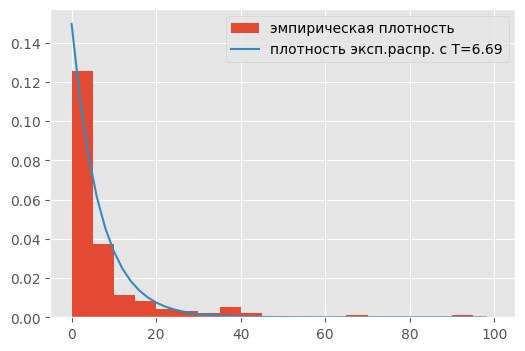

In [68]:
Tmean = round(days_to_connect.mean(), 2)
xbins = np.arange(0, 100, 2)
exp_val = stat.expon(scale=Tmean)

# нарисуем гистограмму распределения интервала времени
plt.figure(figsize=(6, 4))
plt.hist(days_to_connect, bins=x_i,  density=True, label="эмпирическая плотность")
plt.plot(xbins, exp_val.pdf(xbins), label=f"плотность эксп.распр. с T={Tmean}")
plt.legend()
plt.show()

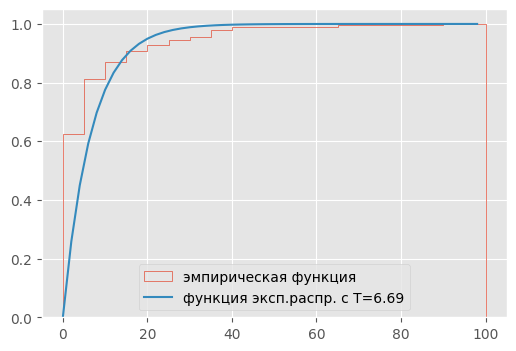

In [71]:
# совместим эмпирическую и теоретическую функции распределения интервала времени
plt.figure(figsize=(6, 4))
plt.hist(days_to_connect, bins=x_i, cumulative=True, histtype='step', density=True, label="эмпирическая функция")
plt.plot(xbins, exp_val.cdf(xbins), label=f"функция эксп.распр. с T={Tmean}")
plt.legend()
plt.show()

### Оценка вероятности попадания в интервал по известной функции распределения
---
Пользуясь определением функции распределения СВ:

$$F_X(x) = p(X \leq x)$$

мы можем находить вероятность попадания СВ в интервал (a, b) по формуле:

$$p(a < X \leq b) = F(b) - F(a)$$

### **ЗАДАЧА**. Рассмотрим СВ "Время подключения клиента по заявке".
- Какова вероятность того, что время подключения будет больше, чем 10 дней?
- Какова вероятность того, что время подключения будет меньше, чем 5 дней?
- Какова вероятность того, что время подключения будет от 5 до 10 дней?

Воспользуйтесь теоретической и эмпирической (восстановленной) функциями нормального распределения.

In [74]:
# Какова вероятность того, что время подключения будет больше, чем 10 дней
p_ge_10 = 1.0 - exp_val.cdf(10)
p_ge_10

0.22430056670457232

In [75]:
# Какова вероятность того, что время подключения будет меньше, чем 5 дней?
p_le_5 = exp_val.cdf(5)
p_le_5

0.5263961922613245

## Нормальное распределение

### **Плотность нормального распределения**
---

Для заданных параметров нормального распределения $m_X, \sigma_X$, его плотность задается следующей формулой:

$$\varphi_X(x, m_X, \sigma_X) = \frac {1}{\sqrt {2\pi} \cdot \sigma_X} exp(-\frac{(x-m_X)^2}{2\sigma^2_X})$$

Если С.В. $X$ подчиняется **нормальному распределению** с параметрами $m, \sigma$, то это обозначается так:

$$X \in N(m, \sigma)$$

---
Под **стандартным нормальным распределением** понимается нормальное распределение с параметрами $m=0, \sigma = 1$.

---


### **Оценка параметров нормального распределения. Восстановленная плотность распределения**
---
Смоделируем С.В. $X$ - время опоздания Васи на занятие. Мы знаем среднее время его опоздания - 5 минут (Вася немножко опоздун), и примем, что серднеквадратическое отклонение $\sigma=2$ мин.

Сгенерируем N наблюдений этой С.В. и посмотрим как можно восстановить по данным наблюдения исходное нормальное распределение.

---

In [56]:
# зададим параметры нормального распределения
mu = 5.0; sigma = 2
# создадим С.В.
norm_rv = stat.norm(loc=mu, scale=sigma)

Параметр ```loc``` задаёт $m_X$, ```scale``` — среднеквадратичное отклонение $\sigma_X$.

In [61]:
# сгенерируем N наблюдений значений СВ
N = 50
xvals = norm_rv.rvs(size=N)
print(xvals[:10], '...')

# оценим параметры нормального распределения по выборке
mu2 = round(xvals.mean(), 2) # среднее выборочное
S2 = stat.moment(xvals, moment=2)  # выборочная дисперсия, центральный момент 2-го порядка
sigma2 = round(np.sqrt(S2), 5)

mu2, sigma2

[1.131 4.103 5.367 5.174 3.186 6.092 5.903 7.037 5.043 4.416] ...


(4.41, 2.1044)

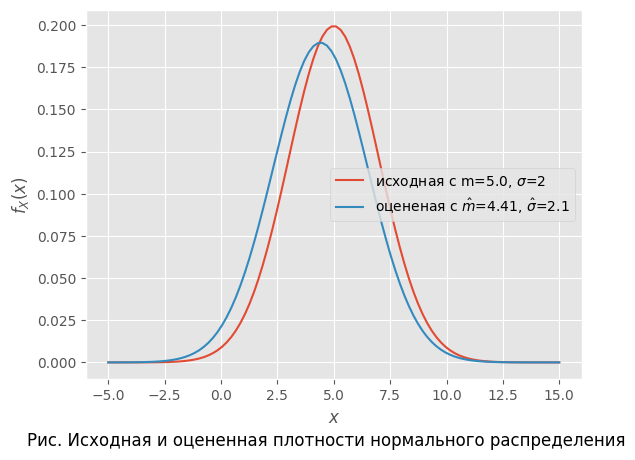

In [63]:
# создадим С.В. с оцененными значениями параметров
norm_rv2 = stat.norm(loc=mu2, scale=sigma2)
x = np.linspace(-5,15,100)

pdf = norm_rv.pdf(x); pdf2 = norm_rv2.pdf(x)
# сравним графики исходной и эмпирической плотности вероятности
plt.plot(x, pdf, label = f'исходная с m={mu}, $\sigma$={sigma}' )
plt.plot(x, pdf2, label = f'оцененая с $\hat m$={round(mu2, 2)}, $\hat \sigma$={round(sigma2, 2)}' )
plt.ylabel('$f_X(x)$'); plt.xlabel('$x$')
plt.legend()
plt.suptitle(f'Рис. Исходная и оцененная плотности нормального распределения', y=0);

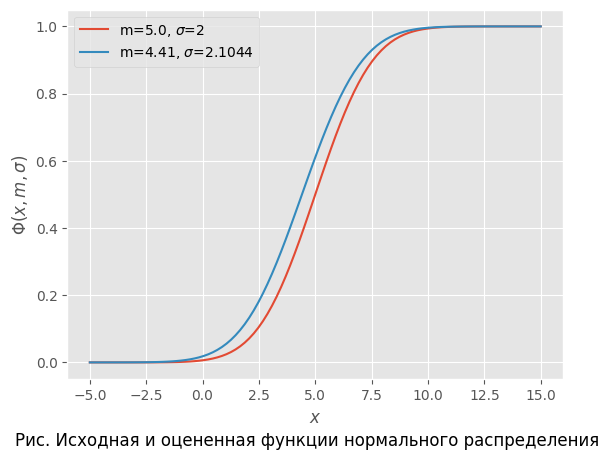

In [64]:
# вычислим значения функции нормального распределения

cdf1 = norm_rv.cdf(x); cdf2 = norm_rv2.cdf(x)
# выведем графики функции нормального распределения
plt.plot(x, cdf1, label = f'm={mu}, $\sigma$={sigma}' )
plt.plot(x, cdf2, label = f'm={mu2}, $\sigma$={sigma2}' )
plt.ylabel('$\Phi(x, m, \sigma)$'); plt.xlabel('$x$')
plt.legend()
plt.suptitle(f'Рис. Исходная и оцененная функции нормального распределения', y=0);

## Оценка вероятности попадания в интервал по известной функции распределения
---
Пользуясь определением функции распределения СВ:

$$F_X(x) = p(X \leq x)$$

мы можем находить вероятность попадания СВ в интервал (a, b) по формуле:

$$p(a < X \leq b) = F(b) - F(a)$$

### **ЗАДАЧА**. Рассмотрим СВ "Время опоздания Васи на занятие".
- Какова вероятность того, что он опоздает больше, чем на 5 минут?
- Какова вероятность того, что он опоздает больше, чем на 10 минут?
- Какова вероятность того, что он опоздает меньше, чем на 2 минуты?

Воспользуйтесь теоретической и эмпирической (восстановленной) функциями нормального распределения.

## Стандартное нормальное распределение $(m=0, \sigma =1)$
Для стандартного нормального распределения функция распределения рассчитывается численно или задается таблично:

$$\Phi(x) = \int_{-\infty}^{x} \varphi(x) dx = \frac {1}{\sqrt {2\pi}} \int_{-\infty}^{x} exp(-\frac{x^2}{2})dx$$

Для расчета интеграла в общем случае, используется преобразование переменных:

$$x' = \frac {x-m_X}{\sigma_X},$$

$$\Phi(x, m_X, \sigma_X) = \frac {1}{\sqrt {2\pi} \cdot \sigma_X} \int_{-\infty}^{x} exp(-\frac{(x-m_X)^2}{2\sigma^2_X})dx = \frac {1}{\sqrt {2\pi}} \int_{-\infty}^{x} exp(-\frac{(x-m_X)^2}{2\sigma^2_X})d(\frac {x-m_X}{\sigma_X}) = \frac {1}{\sqrt {2\pi}} \int_{-\infty}^{\frac {x-m_X}{\sigma_X}} exp(-\frac{x'^2}{2})dx' = \Phi (\frac {x-m_X}{\sigma_X})$$


### **ЗАДАЧА**. Пусть при росте в 1м75см средний вес человека составляет 75 кг, а СКО = 5 кг.
Какова вероятность того, что вес произвольно взятого человека с ростом 1м75см превысит 90 кг?
Воспользуйтесь функцией нормального распределения.